In [10]:
import pandas as pd 
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


/var/folders/qt/11wp7xx1493f_p0_rlcbnb5r0000gn/T/ipykernel_8081/3259767703.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [11]:
df= pd.read_csv('/Users/hamzehshibly/Desktop/ProgressSoft/task5/prices.txt')

In [12]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index(['Date'])

In [13]:
df.index = pd.DatetimeIndex(df.index).to_period('d')

In [14]:
df

,Price
Date,
2017-02-21,55.478001
2017-02-22,54.702000
2017-02-23,51.198002
2017-02-24,51.400002
2017-02-27,49.245998
...,...
2022-02-11,860.000000
2022-02-14,875.760010
2022-02-15,922.429993


In [15]:
model = ARIMA(df, order=(1,1,0))
model_fit = model.fit()

In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1259
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5306.825
Date:                Tue, 21 Feb 2023   AIC                          10617.650
Time:                        15:24:25   BIC                          10627.925
Sample:                    02-21-2017   HQIC                         10621.511
                         - 02-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0327      0.014     -2.363      0.018      -0.060      -0.006
sigma2       270.3783      3.433     78.749      0.000     263.649     277.108
Ljung-Box (L1) (Q):                   0.01   Jarque-

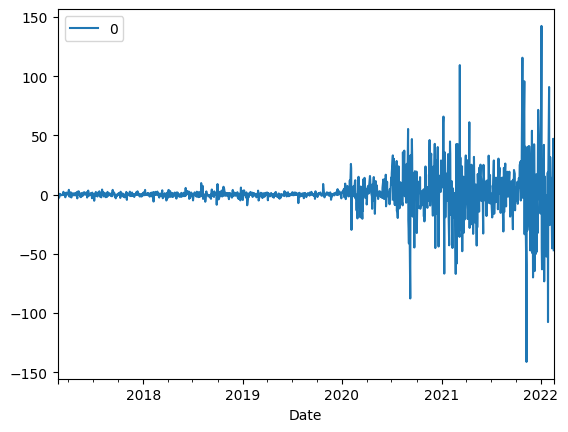

In [17]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

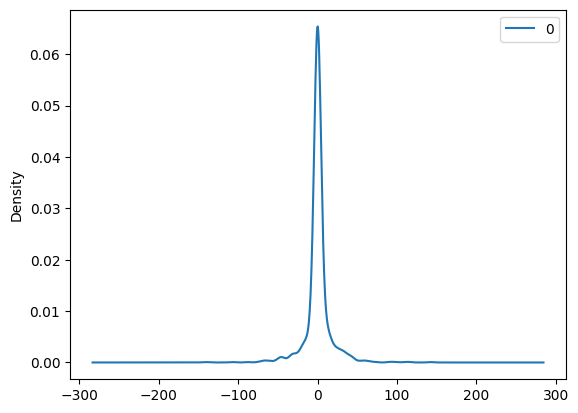

In [18]:
residuals.plot(kind='kde')
pyplot.show()

In [19]:
print(residuals.describe())

                 0
count  1259.000000
mean      0.718586
std      16.495400
min    -141.372039
25%      -1.600118
50%       0.161339
75%       2.112350
max     142.557073


In [20]:
X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [21]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=781.424188, expected=714.500000
predicted=715.577254, expected=698.840027
predicted=698.915892, expected=742.020020
predicted=741.517463, expected=682.219971
predicted=684.428746, expected=675.500000
predicted=675.713960, expected=718.429993
predicted=716.945586, expected=686.440002
predicted=687.938846, expected=653.200012
predicted=654.414470, expected=621.440002
predicted=622.280392, expected=597.950012
predicted=598.406331, expected=563.000000
predicted=563.415536, expected=673.580017
predicted=668.450555, expected=668.059998
predicted=668.317946, expected=699.599976
predicted=698.082208, expected=693.729980
predicted=694.018904, expected=707.940002
predicted=707.231285, expected=676.880005
predicted=678.536155, expected=701.809998
predicted=700.337481, expected=653.159973
predicted=656.485022, expected=654.869995
predicted=654.754162, expected=670.000000
predicted=668.978189, expected=662.159973
predicted=662.695709, expected=630.270020
predicted=632.386472, expected=640

In [22]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 31.303


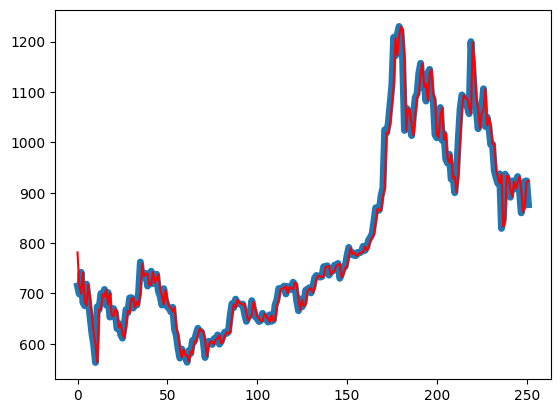

In [24]:
pyplot.plot(test , linewidth=5)
pyplot.plot(predictions, color='red')
pyplot.show()